<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Chemical modelling: Carbon dioxide in air and water
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we discuss the **concentraton of carbon dioxide in air and water**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geodyn_div;geodyn_div.change_fonts()

In [2]:
R        = 8.314   # Gas constant, Pa m3 / K / mol
atm2Pa   = 101325. # 1 atm = 101325 Pa
liter2m3 = 1.e-3   # 1 l   = 1000 cm3 = 10^-3 m3 
year2sec = 365*24*60*60
day2sec  = 24*60*60
min2sec  = 60
tiny     = 1e-20

----
## Dissolution of carbon dioxide in water
<img src="images/scheme_waterco2.jpg" style="height:50mm">

**Carbon dioxide** (CO$_2$) is a naturally occuring molecule, which under standard conditions
is present in its gas phase. The carbon-dioxide molecule is composed of one positively charged
carbon atom (C) and two negatively charged oxygen, forming a covalent bond. As the bond is
linear and symmetrical, no macroscopic electrical charge is present.

Carbon dioxide is the atmosphere, CO$_2^{gas}$, can be physically dissolved in water, CO$_2^{aq}$,
a process depending mainly on **temperature**~$T$ [$^{\circ}$] and the 
**partial carbon-dioxide pressure** $p_{{\rm CO}_2}$ [atm]:
$$
\mbox{CO}_2^{gas} \overset{K_H}{\underset{}{\leftrightarrow}} \mbox{CO}_2^{aq}
$$

### Henry constant
The reaction is described by the **equilibrium constant** $K_H$ (Henry constant):
$$
K_H = \frac{(CO_2^{(aq)})}{pCO_2}
$$
with
- $(CO_2^{(aq)})$ [mol/l] carbon-dioxide activity in solution
- $pCO_2$ [atm] carbon-dioxide partial pressure
- $K_H$ [mol/l/atm]

If the reaction is **not** in equilibrium, we have discussed the corresponding equations in 
the previous chapter ...

In [3]:
def KH(TC):
    """
    -----------------------------------------------------------------------
    KH - Henry constant (solubility of CO2 in water)
    from: 
    Weiss, R. F., Marine Chemistry 2:203-215, 1974.
    input:
    TC [C]         - temperature
    output:
    KH [mol/l/atm] - CO2gas <-> CO2water
    -----------------------------------------------------------------------
    """
    TK = 273.16 + TC
    KH =  -60.2409 + (93.4517 / (TK/100)) + (23.3585 * np.log((TK/100)))
    KH = np.exp(KH)
    return KH

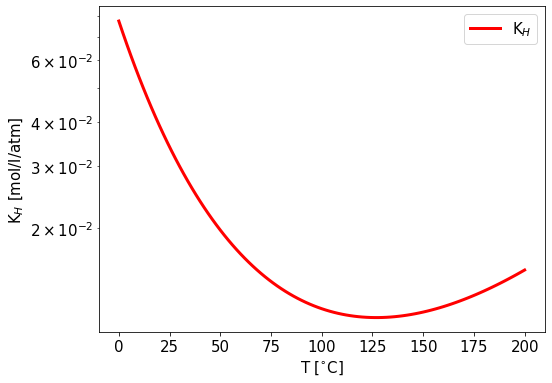

In [4]:
TC = np.linspace(0,200,101)

plt.figure(figsize=(8,6))
plt.xlabel('T [$^{\circ}$C]')
plt.ylabel('K$_H$ [mol/l/atm]')
plt.semilogy(TC,KH(TC),linewidth=3,color='red',label='K$_H$')
plt.legend()
plt.savefig('figures/CHEM_KH.png')

The solubility decreases from 0 to 125$^{\circ}$C from values around $10^{-1}$ to $10^{-2}$, 
then it increases again.

### From mole fraction [ppm] to concentration [mol/l]
In the introduction, we used the **ideal gas law** to convert carbon-dioxide partial pressure,
e.g. 420 ppm, the *mole fraction* of carbon dioxide in air, to a concentration (molarity), using:
$$
p = [CO_2]^{gas} R T_K
$$
with $R=8.314$ [Pa m$^3$ / K / mol] the universal gas constant, and $T_K$ [K] the temperature.

**Example:**

- 420 parts of CO$_2$ are contained 1,000,000 parts of air.
- The **total air pressure at sea level** is around 1 atm, the **partial pressure** of CO$_2$ is then:
$$
\mbox{pCO}_2 \simeq 0.00042 \mbox{ atm} = 0.00042 \times 101325 = 42.6 Pa
$$
- The concentration of CO$_2$ is then, for $T=20^{\circ}$C:
$$
[CO_2]^{gas} = \frac{p}{R T_K} = \frac{42.6}{8.314 (273 + 20)}
$$

Thus, 420 ppm of CO$_2$, for a temperature of 20$^\circ$C, corresponds to a concentration
$$
[\mbox{CO}_2]^{gas} = \frac{p}{RT} \sim 0.017 \mbox{ mol/m}^3 = 1.7 \times 10^{-5} \mbox{ mol/l}
$$

The corresponding concentration of carbon dioxide in water, [CO$_2$], is then
$$
[\mbox{CO}_2]^{aq} = pCO_2 K_H(T=25^{\circ}C) \simeq 1.43 \times 10^{-5} \mbox{ mol/l}
$$


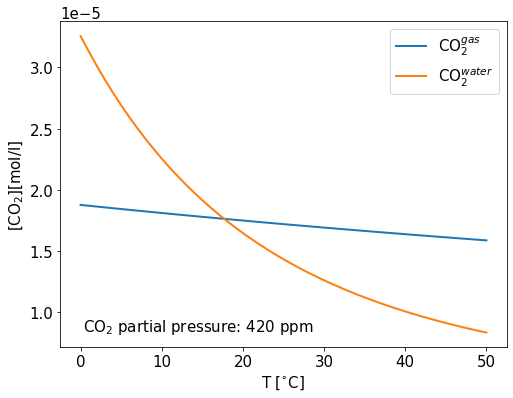

In [5]:
TC = np.linspace(0,50,51)
CO2ppm = 420
CO2gas   = CO2ppm*1e-6 *atm2Pa / R / (TC+273) * liter2m3
CO2water = KH(TC)*CO2ppm*1e-6

fig,ax = plt.subplots(1,1,figsize=(8,6))
plt.xlabel('T [$^{\circ}$C]')
plt.ylabel('[CO$_2$][mol/l]')
plt.plot(TC,CO2gas,linewidth=2,label='CO$_2^{gas}$')
plt.plot(TC,CO2water,linewidth=2,label='CO$_2^{water}$')
plt.text(0.05,0.05,'CO$_2$ partial pressure: '+str(CO2ppm)+' ppm',transform=ax.transAxes)
plt.legend()
plt.savefig('figures/CHEM_CO2_water_air.png')

----
## Literature

- Dreybrodt, Laukner, Svensson, Liu, Buhmann (1996). <br> **The kinetics of the reaction CO2 + H2O → H+ + HCO3− as one of the rate limiting steps for the dissolution of calcite in the system H2OCO2CaCO3**, Geochim. Cosmochim. Acta, 60(18):3375–3381
- Millero, Graham, Huang, Bustos-Serrano, Pierrot (2006). **Dissociation constants of carbonic acid in seawater as a function of salinity and temperature**,
Marine Chemistry 100(1-2):80-94.
- Schulz, Riebesell, Rost, Toms, Zeebe (2006): **Determination of the rate constants for the carbon dioxide to
bicarbonate inter-conversion in pH-buffered seawater systems**,
Marine Chemistry 100 (2006) 53–65.

----